## Wine Dataset Dimension Reduction & Classification using QDA

qda을 이용하여 차원 축소가 적용된 wine 데이터셋 분류

<span style="color: #2D3748; background-color:#fff5b1;">qda를 적용하여 feature의 수를 2개와 1개로 구성한 후 qda을 이용하여 실험한 결과 정확도 측면에서는 차원 축소를 적용하지 않은 방법과 비슷하지만 분류 시간의 경우 차원 축소를 적용하지 않은 경우 시간이 증가하였다.</span>

In [73]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [74]:
comparison_test = []
comparison_time = []

wine = load_wine()

### LDA Feature 2 Visualization & QDA Classification

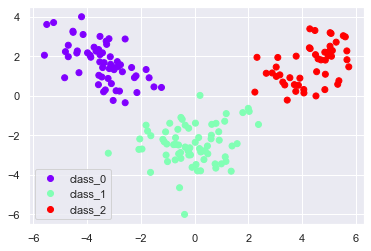

(178, 2)


In [75]:
lda = LinearDiscriminantAnalysis(n_components=2)
features = lda.fit_transform(wine.data, wine.target)
target = wine.target

x = features[:, 0]
y = features[:, 1]

plt.figure()
img = plt.scatter(x, y, c=wine.target, cmap=plt.cm.rainbow)
plt.legend(img.legend_elements()[0], wine.target_names)
plt.show()

print(features.shape)

In [76]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = qda.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  142  / test size :  36
----------------------------------------
Test set score: 1.000000
Training Time : 0.0002 sec


### LDA Feature 1 Visualization & QDA Classification

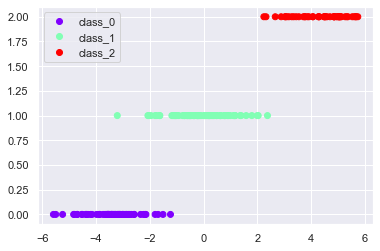

(178, 1)


In [77]:
lda = LinearDiscriminantAnalysis(n_components=1)
features = lda.fit_transform(wine.data, wine.target)
target = wine.target

x = features[:, 0]
y = wine.target

plt.figure()
img = plt.scatter(x, y, c=wine.target, cmap=plt.cm.rainbow)
plt.legend(img.legend_elements()[0], wine.target_names)
plt.show()

print(features.shape)

In [78]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = qda.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  142  / test size :  36
----------------------------------------
Test set score: 0.936111
Training Time : 0.0002 sec


## QDA Classification Feature 13 (Original Dataset)

In [79]:
wine = load_wine()

features = wine.data
feature_names = wine.feature_names
target = wine.target
target_names = wine.target_names

In [80]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = qda.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  142  / test size :  36
----------------------------------------
Test set score: 0.991667
Training Time : 0.0002 sec


### Method Comparison

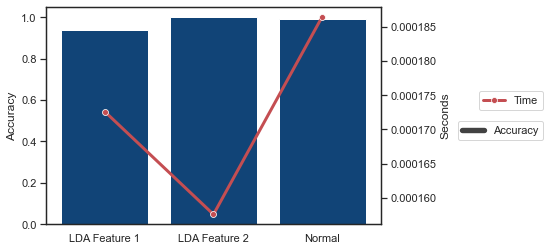

In [81]:
import seaborn as sns

sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

bar = sns.barplot(x=["LDA Feature 1", "LDA Feature 2", "Normal"],
            y=[comparison_test[1], comparison_test[0], comparison_test[2]], 
            color='#004488',
            ax=ax1)

line = sns.lineplot(x=["LDA Feature 1", "LDA Feature 2", "Normal"], 
             y=[comparison_time[1], comparison_time[0], comparison_time[2]],
             color='r',
             marker="o",
             ax=ax2)

ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Seconds")

ax1.legend(["Accuracy"], loc=1, bbox_to_anchor=(1.5, 0.5))
ax2.legend(["Time"], loc=4, bbox_to_anchor=(1.5, 0.5))

plt.show()
sns.set()